## **1. Data Loading & Description**

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\mmush\appdata\local\programs\python\python312\lib\site-packages (1.5.1)




[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install imblearn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install shap


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import csv
from scipy.stats import randint
from scipy.stats import uniform

In [8]:
churn = pd.read_csv('cleaned_churn_data_imputasi.csv', sep=',')
churn

,LOS_GROUP,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,USAGE_INET_FUP,...,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE,IS_CHURN
0,2.0,54.451613,54.451613,5.0,1.0,1.0,0.0,30720.0,287267038.0,1.006862e+09,...,0.0,305.0,0.0,8899.0,3.0,386.759821,0.0,18.000000,3.0,0.0
1,2.0,29.225806,29.225806,4.0,1.0,0.0,0.0,20480.0,43884331.0,2.097152e+08,...,0.0,563.0,0.0,8900.0,4.0,563.000000,0.0,37.926371,0.0,0.0
2,2.0,53.741935,53.741935,6.0,1.0,0.0,0.0,40960.0,344170514.0,1.228693e+09,...,0.0,1656.0,0.0,8909.0,5.0,1365.000000,0.0,18.000000,3.0,0.0
3,2.0,47.000000,47.000000,2.0,1.0,0.0,0.0,30720.0,239919789.0,1.001246e+09,...,0.0,1004.0,0.0,8900.0,5.0,300.000000,0.0,18.000000,3.0,0.0
4,2.0,33.967742,33.967742,5.0,1.0,0.0,0.0,30720.0,272165384.0,1.010684e+09,...,0.0,368.0,0.0,8896.0,0.0,210.000000,0.0,18.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,48.709677,48.709677,1.0,1.0,0.0,0.0,30720.0,247940065.0,1.008979e+09,...,0.0,907.0,0.0,8902.0,4.0,1197.000000,0.0,18.000000,3.0,0.0
1048571,2.0,6.580645,6.580645,7.0,1.0,0.0,0.0,51200.0,302402479.0,1.585034e+09,...,0.0,219.0,0.0,8897.0,4.0,337.454408,0.0,18.000000,3.0,0.0
1048572,2.0,10.903226,10.903226,5.0,1.0,1.0,0.0,30720.0,2834800.0,1.153434e+09,...,10.0,92.0,6.0,8902.0,5.0,484.418683,0.0,2.000000,3.0,0.0
1048573,1.0,5.419355,5.419355,5.0,1.0,0.0,0.0,30720.0,557241059.0,1.300477e+08,...,4.0,184.0,0.0,8896.0,1.0,295.056296,0.0,18.000000,3.0,0.0


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 63 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   LOS_GROUP           1048575 non-null  float64
 1   LOS_CUST_           1048575 non-null  float64
 2   JTAG                1048575 non-null  float64
 3   DIVRE_ID            1048575 non-null  float64
 4   IS_FIBER            1048575 non-null  float64
 5   TOTAL_MINIPACK      1048575 non-null  float64
 6   TOTAL_STB_TAMBAHAN  1048575 non-null  float64
 7   SPEED               1048575 non-null  float64
 8   USAGE_INET          1048575 non-null  float64
 9   USAGE_INET_FUP      1048575 non-null  float64
 10  RATIO_USAGE         1048575 non-null  float64
 11  GR_USAGE            1048575 non-null  float64
 12  USAGE_USEETV        1048575 non-null  float64
 13  USAGE_POTS_OUT      1048575 non-null  float64
 14  USAGE_POTS_IN       1048575 non-null  float64
 15  REV_ARPU       

## **2. Preprocessing Data**

### Data Splitting

In [10]:
churn['Class'] = churn['IS_CHURN'].map({0:0,1:1})

churn = churn.drop('IS_CHURN', axis=1)

In [11]:
# Split the data into features (X) and target (y)
X = churn.drop('Class', axis=1)
y = churn['Class']

In [12]:
X_tosmote, X_test, y_tosmote, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
X_tosmote.shape, X_test.shape, y_tosmote.shape, y_test.shape

((734002, 62), (314573, 62), (734002,), (314573,))

### Data Balancing

In [14]:
smote = SMOTEENN()
X_train, y_train = smote.fit_resample(X_tosmote, y_tosmote)

print("The new data contains {} rows".format(X_train.shape[0]))

The new data contains 788229 rows


In [15]:
from collections import Counter

Counter(y_train)


print('Before SMOTE:')
print(Counter(y_tosmote))

print('After SMOTE:')
print(Counter(y_train))

Before SMOTE:
Counter({0: 684812, 1: 49190})
After SMOTE:
Counter({1: 446036, 0: 342193})


In [16]:
y_train.value_counts()

Class
1    446036
0    342193
Name: count, dtype: int64

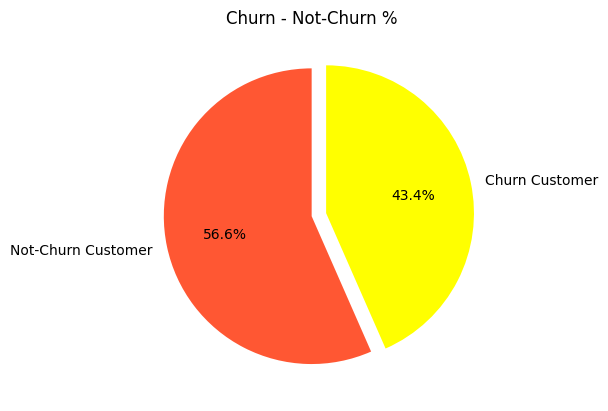

In [17]:
# Hitung distribusi dari nilai y_resampled
y_counts = y_train.value_counts()

# Buat pie chart berdasarkan distribusi y_train
plt.pie(
    y_counts, 
    labels=['Not-Churn Customer', 'Churn Customer'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#FF5733', 'yellow'], 
    explode=(0, 0.1)
)

# Tambahkan judul
plt.title('Churn - Not-Churn %')

# Tampilkan plot
plt.show()

### Data Scaling

In [18]:
X_train.describe()

,LOS_GROUP,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,USAGE_INET_FUP,...,JHARI_TRX,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE
count,788229.000000,7.882290e+05,7.882290e+05,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,7.882290e+05,7.882290e+05,...,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000,788229.000000
mean,1.843595,1.845028e+07,1.390345e+07,3.690696,0.999999,0.149808,0.009189,29971.817019,2.334446e+08,8.451785e+08,...,302.980577,1.300980,576.617441,0.246153,8881.307480,2.321201,350.569832,0.390203,21.942978,2.313924
std,0.354180,9.279949e+07,8.445161e+07,1.900638,0.001126,0.468223,0.093913,12296.682234,2.107544e+08,4.245063e+08,...,393.539105,2.117205,460.066435,0.729670,425.900068,1.605735,222.819925,0.910094,8.732627,0.999495
min,0.108119,1.027897e+00,1.029032e+00,1.000000,0.000000,0.000000,0.000000,5120.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,-257.220120,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.055860e+01,1.045699e+01,2.000000,1.000000,0.000000,0.000000,20480.000000,9.902203e+07,5.128686e+08,...,142.582722,0.000000,272.316169,0.000000,8898.330764,1.000000,203.000000,0.000000,18.000000,2.000000
50%,2.000000,2.325806e+01,2.312903e+01,3.566484,1.000000,0.000000,0.000000,30720.000000,1.977814e+08,1.005597e+09,...,259.018567,0.000000,517.000000,0.000000,8899.251529,2.000000,340.908143,0.000000,18.000000,3.000000
75%,2.000000,3.724032e+01,3.696774e+01,5.000000,1.000000,0.000000,0.000000,30720.000000,3.201856e+08,1.063404e+09,...,358.000000,1.961380,754.000000,0.000000,8901.164141,3.815538,443.534743,0.461120,20.000000,3.000000
max,2.000000,9.935484e+08,9.935484e+08,7.000000,1.000000,13.000000,2.000000,102400.000000,4.294967e+09,4.246733e+09,...,6514.000000,38.000000,5912.000000,21.000000,29892.000000,6.000000,1468.000000,32.000000,80.000000,3.000000


In [19]:
# # Pilih hanya kolom numerik
# numeric_cols = X_train.select_dtypes(include=['number']).columns

# Buat objek StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing
X_test = scaler.transform(X_test)

In [20]:
# Hitung rata-rata dan standar deviasi dari data training
mean = X_train.mean()
std = X_train.std()

# Hitung Z-score untuk data training
X_train = (X_train - mean) / std

# Hitung Z-score untuk data testing menggunakan mean dan std dari data training
X_test = (X_test - mean) / std

# # Menampilkan beberapa baris pertama dari data training yang telah di-scaling
# print(X_train.head())

## **3. EDA**

### Summary Statistics

### Analisis Univariate & Multivariate

## **4. Build Model**

In [24]:
# Fungsi untuk mencetak laporan klasifikasi, akurasi, confusion matrix, AUC & ROC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    
    # Menghitung AUC & ROC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print('AUC:', roc_auc)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        print('AUC:', roc_auc)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support predict_proba method.")   

### Decision Tree

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92    293563
           1       0.15      0.27      0.19     21010

    accuracy                           0.85    314573
   macro avg       0.55      0.58      0.55    314573
weighted avg       0.89      0.85      0.87    314573

Accuracy: 0.8495071096375086
AUC: 0.579370701314231


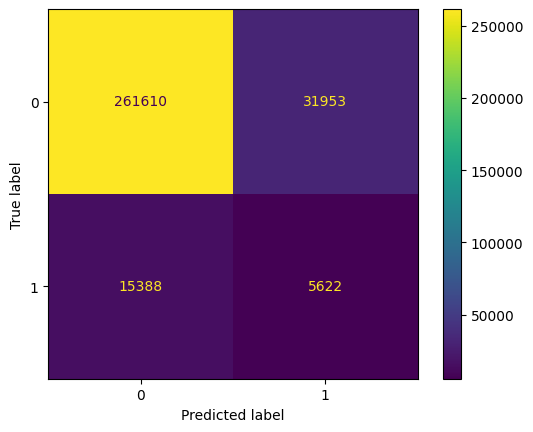

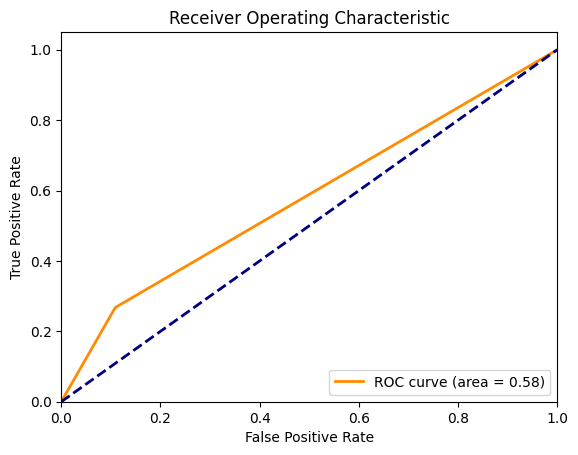

In [25]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test)

In [24]:
# # Hyperparameter Tuning
# # Randomized Search
# param_dist = {'max_depth': randint(1,20), 'min_samples_split': randint(2,20)}
# dt = DecisionTreeClassifier()
# rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5)
# rand_search.fit(X_train, y_train)
# best_dt = rand_search.best_estimator_
# print('Best hyperparameters for Decision Tree:', rand_search.best_params_)

# # Grid Search
# parameters = {'max_depth': range(5,20,5), 'min_samples_split': range(2,20,5)}
# grid_search = GridSearchCV(dt, parameters, cv=5)
# grid_search.fit(X_train, y_train)

# hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

# hasil_grid_df.to_csv ('hasil_grid_search_params_churn.csv', index = False, header=True) 

### Random Forest

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    293563
           1       0.40      0.14      0.21     21010

    accuracy                           0.93    314573
   macro avg       0.67      0.56      0.59    314573
weighted avg       0.91      0.93      0.91    314573

Accuracy: 0.9281661172446459
AUC: 0.7380233314188562


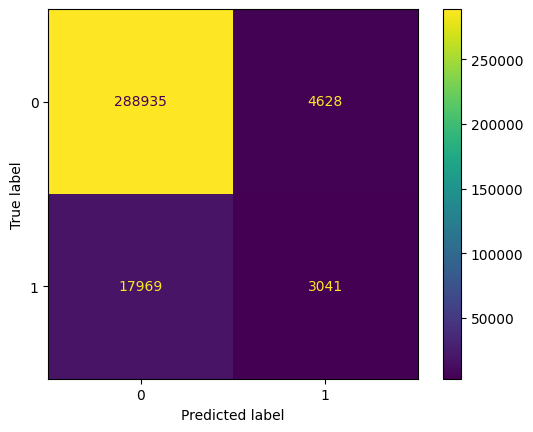

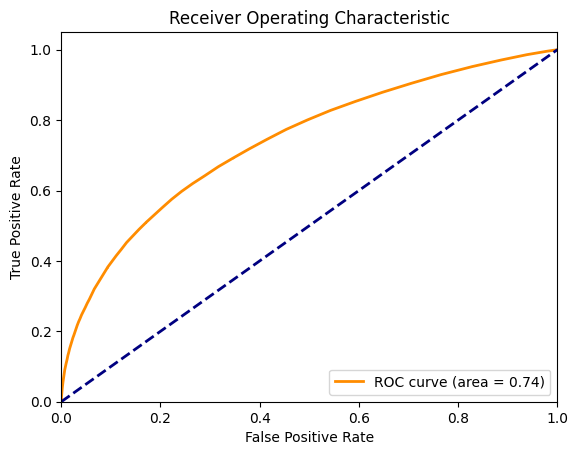

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

### Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.62      0.75    293563
           1       0.11      0.68      0.19     21010

    accuracy                           0.62    314573
   macro avg       0.54      0.65      0.47    314573
weighted avg       0.91      0.62      0.72    314573

Accuracy: 0.6225899870618267
AUC: 0.7083253366547517


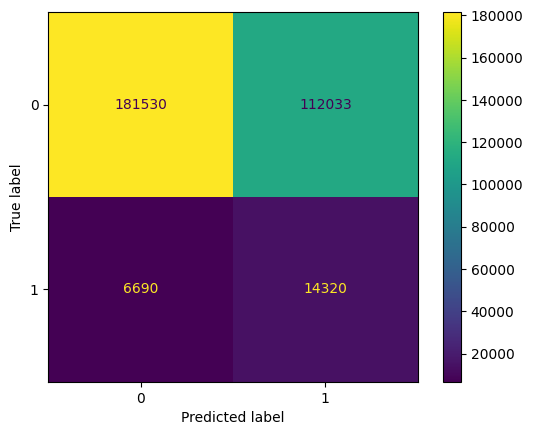

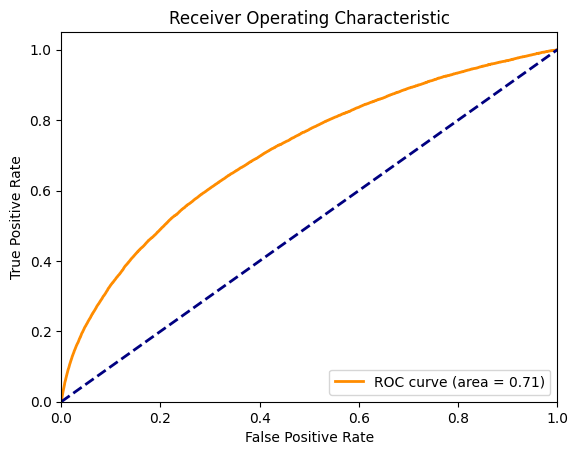

In [27]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test)

### Ridge Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75    293563
           1       0.11      0.69      0.19     21010

    accuracy                           0.62    314573
   macro avg       0.54      0.65      0.47    314573
weighted avg       0.91      0.62      0.71    314573

Accuracy: 0.619490547504077
AUC: 0.7068639286229655


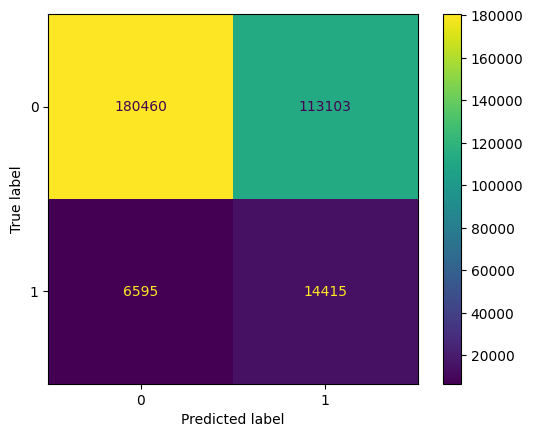

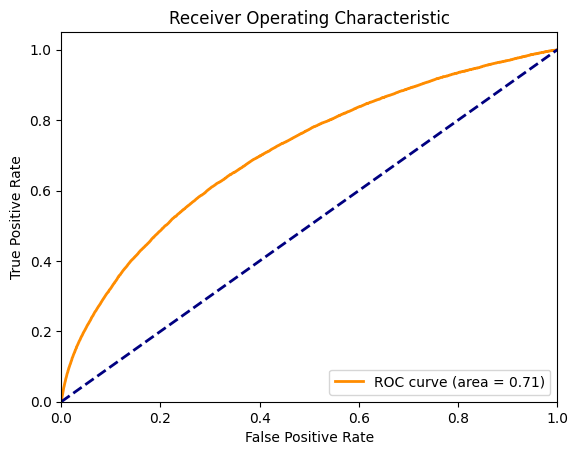

In [28]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)

### XG Boost

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    293563
           1       0.41      0.16      0.23     21010

    accuracy                           0.93    314573
   macro avg       0.68      0.57      0.60    314573
weighted avg       0.91      0.93      0.91    314573

Accuracy: 0.9284299669711005
AUC: 0.7622051870081044


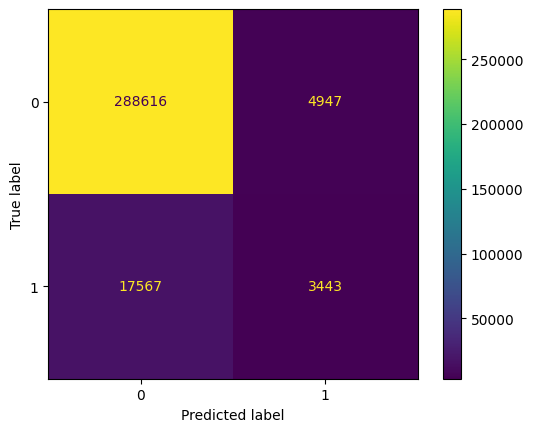

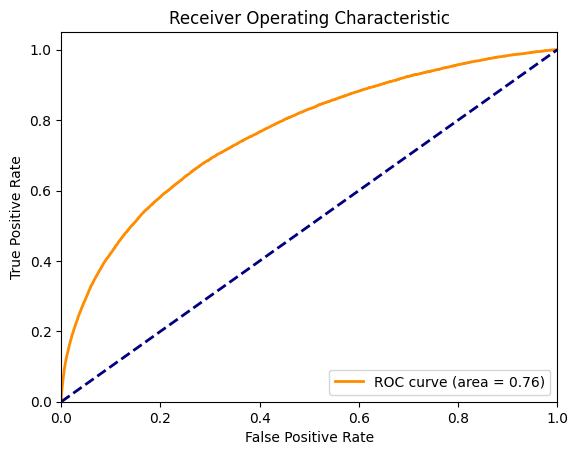

In [29]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

### Cat Boost

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    293563
           1       0.43      0.18      0.25     21010

    accuracy                           0.93    314573
   macro avg       0.69      0.58      0.61    314573
weighted avg       0.91      0.93      0.92    314573

Accuracy: 0.9292374107122989
AUC: 0.7703613388645203


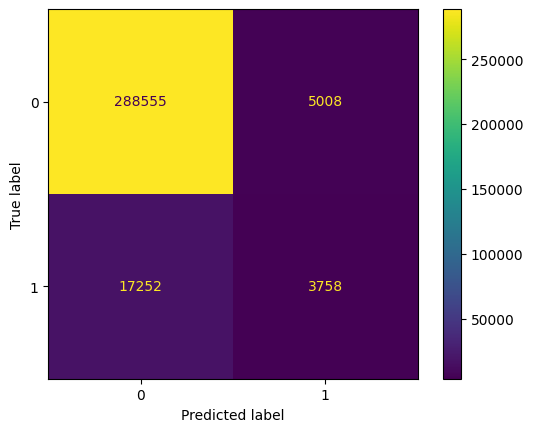

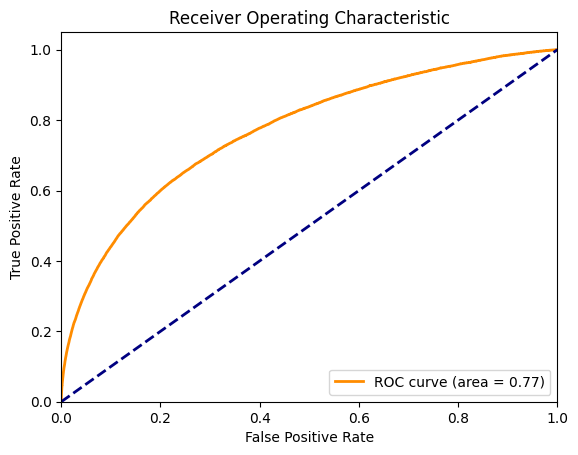

In [30]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
evaluate_model(catboost, X_test, y_test)

### Light GBM

[LightGBM] [Info] Number of positive: 446036, number of negative: 342193
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.241918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14160
[LightGBM] [Info] Number of data points in the train set: 788229, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565871 -> initscore=0.265025
[LightGBM] [Info] Start training from score 0.265025
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    293563
           1       0.41      0.14      0.21     21010

    accuracy                           0.93    314573
   macro avg       0.67      0.56      0.59    314573
weighted avg       0.91      0.93      0.91    314573

Accuracy: 0.928903624913772
AUC: 0.758725316882253


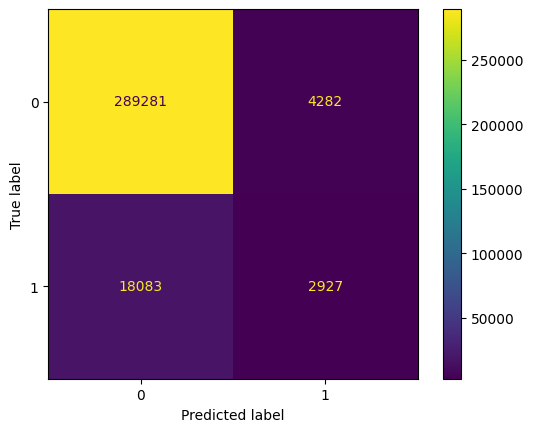

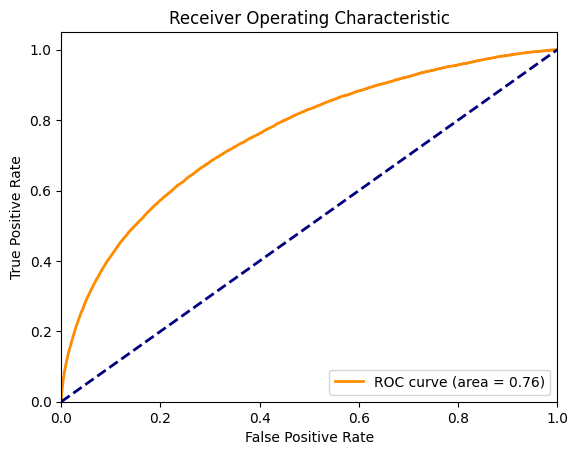

In [31]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test)

### KNN

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84    293563
           1       0.11      0.41      0.17     21010

    accuracy                           0.73    314573
   macro avg       0.53      0.58      0.50    314573
weighted avg       0.89      0.73      0.79    314573

Accuracy: 0.730310611527372
AUC: 0.6065526597949895


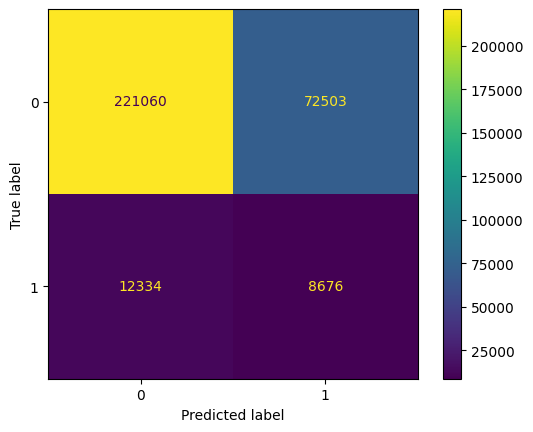

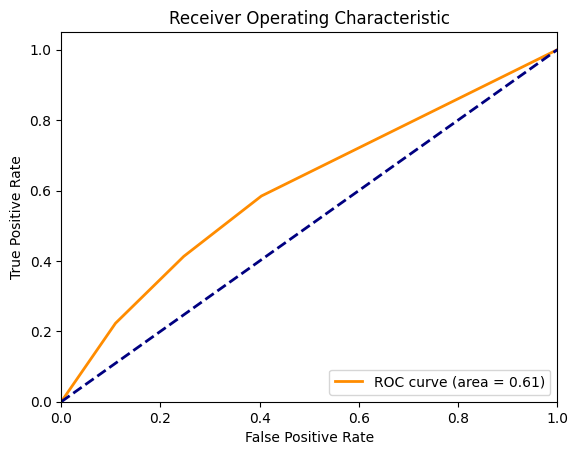

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)